In [1]:
from google.colab import drive
drive.mount("/content/drive")

file_path = "/content/drive/My Drive/D&C/MOSAIKS/Poverty_Mapping/Trial1/"

Mounted at /content/drive


**Data Preparation**

In [2]:
import numpy as np
import pandas as pd

# Reading the csv for the gps file
gps_raw = pd.read_csv(file_path + 'Geographic Dataset.csv')
gps_raw.rename(columns = {'DHSCLUST':'CLUSTNUM'}, inplace = True)
gps_raw.head()

,X,Y,DHSID,DHSCC,DHSYEAR,CLUSTNUM,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,...,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,120.564542,18.271892,PH201700000386,PH,2017.0,386.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.271892,120.564542,9999.0,17.0,WGS84
1,120.568506,18.202195,PH201700000387,PH,2017.0,387.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,U,18.202195,120.568506,9999.0,10.0,WGS84
2,120.691113,18.073914,PH201700000388,PH,2017.0,388.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.073914,120.691113,9999.0,39.0,WGS84
3,120.510203,18.061017,PH201700000389,PH,2017.0,389.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.061017,120.510203,9999.0,13.0,WGS84
4,120.663074,18.155694,PH201700000390,PH,2017.0,390.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.155694,120.663074,9999.0,126.0,WGS84


In [ ]:
len(gps_raw)

1250

In [3]:
# Adding the corresponding radius
gps_raw['RADIUS(KM)'] = np.where(gps_raw['URBAN_RURA'] == 'U', 2, 10)

# Selecting relevant columns only
gps = gps_raw[['DHSID', 'CLUSTNUM', 'URBAN_RURA', 'RADIUS(KM)', 'LATNUM', 'LONGNUM',]]
gps 

,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LATNUM,LONGNUM
0,PH201700000386,386.0,R,10,18.271892,120.564542
1,PH201700000387,387.0,U,2,18.202195,120.568506
2,PH201700000388,388.0,R,10,18.073914,120.691113
3,PH201700000389,389.0,R,10,18.061017,120.510203
4,PH201700000390,390.0,R,10,18.155694,120.663074
...,...,...,...,...,...,...
1245,PH201700000722,722.0,R,10,12.480412,122.014801
1246,PH201700000723,723.0,R,10,12.332112,121.948492
1247,PH201700000724,724.0,R,10,12.825163,122.082036
1248,PH201700000725,725.0,R,10,12.506513,122.308962


In [4]:
gps.rename(columns = {'LATNUM':'LAT_GPS', 'LONGNUM':'LON_GPS'}, inplace = True)
gps.head()

<ipython-input-4-e99ea2f85b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps.rename(columns = {'LATNUM':'LAT_GPS', 'LONGNUM':'LON_GPS'}, inplace = True)


,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS
0,PH201700000386,386.0,R,10,18.271892,120.564542
1,PH201700000387,387.0,U,2,18.202195,120.568506
2,PH201700000388,388.0,R,10,18.073914,120.691113
3,PH201700000389,389.0,R,10,18.061017,120.510203
4,PH201700000390,390.0,R,10,18.155694,120.663074


In [5]:
# Dropping the rows with 0 lonlat
gps_no_zeros = gps[~( gps[['LAT_GPS','LON_GPS']] == 0).all(axis=1)]
len(gps_no_zeros)

1214

In [ ]:
# Saving the file to csv so we could input it in MOSAIKS API

# labeled_no_zeros.to_csv('labeled_no_zeros.csv', index=False)
# labeled_no_zeros.to_csv(file_path + 'labeled_no_zeros.csv')

**MOSAIKS Features**

In [6]:
# Reading the output of the MOSAIKS API
gps_mosaiks_features = pd.read_csv(file_path + 'gps_mosaiks_features.csv')
gps_mosaiks_features.rename(columns = {'Lat':'LAT_MOSAIKS', 'Lon':'LON_MOSAIKS'}, inplace = True)

# Adding index
gps_mosaiks_features['MOSAIKSID'] = gps_mosaiks_features.index
gps_mosaiks_features.insert(0, 'MOSAIKSID', gps_mosaiks_features.pop('MOSAIKSID'))
gps_mosaiks_features.head()

,MOSAIKSID,LAT_MOSAIKS,LON_MOSAIKS,,.1,.2,.3,.4,.5,.6,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,0,15.155,120.065,0.360438,0.734940,0.274160,0.148073,0.517569,1.124553,0.375927,...,0.806185,0.664477,1.649275,1.027546,0.587243,1.337231,4.149068,1.023335,0.846763,0.459683
1,1,15.065,120.105,0.070289,0.200259,0.048072,0.033989,0.105235,0.232242,0.135939,...,0.083247,0.067083,0.334141,0.152091,0.060926,0.260025,1.140920,0.216739,0.152828,0.058042
2,2,14.945,120.195,0.158908,0.221345,0.144350,0.023685,0.188185,0.366871,0.267813,...,0.230832,0.179911,0.669945,0.483390,0.189105,0.436181,1.622777,0.429767,0.327598,0.229353
3,3,14.905,120.205,0.098368,0.199814,0.100161,0.023298,0.131806,0.299751,0.187593,...,0.181514,0.171181,0.553744,0.271193,0.107971,0.316268,1.492580,0.280529,0.153531,0.138649
4,4,15.915,120.205,0.117319,0.308258,0.090169,0.080226,0.179748,0.385946,0.243270,...,0.160039,0.126198,0.473448,0.244850,0.112848,0.465620,1.452229,0.479220,0.242966,0.122588


In [7]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, long1, lat2, long2):
    # Decimal degrees to radians 

    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    
    # Haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 

    # Radius of earth in kilometers is 6371000
    m = 6371000 * c
    return m

In [8]:
# Finding the closest mosaiks coordinates
def find_nearest(lat, long):
    closest = gps_mosaiks_features.apply(
        lambda row: distance(lat, long, row['LAT_MOSAIKS'], row['LON_MOSAIKS']), 
        axis=1)
    return gps_mosaiks_features.loc[closest.idxmin(), 'MOSAIKSID']

In [9]:
# Appending the closest coordinates to the of the gps file
gps_no_zeros['MOSAIKSID'] = gps_no_zeros.apply(
    lambda row: find_nearest(row['LAT_GPS'], row['LON_GPS']), 
    axis=1)
gps_no_zeros.head()

<ipython-input-9-17b98345f15a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_no_zeros['MOSAIKSID'] = gps_no_zeros.apply(


,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,MOSAIKSID
0,PH201700000386,386.0,R,10,18.271892,120.564542,67
1,PH201700000387,387.0,U,2,18.202195,120.568506,66
2,PH201700000388,388.0,R,10,18.073914,120.691113,114
3,PH201700000389,389.0,R,10,18.061017,120.510203,51
4,PH201700000390,390.0,R,10,18.155694,120.663074,106


In [10]:
# Merging the two dfs
matched = pd.merge(gps_no_zeros[['DHSID', 'MOSAIKSID', 'CLUSTNUM',  'URBAN_RURA', 'RADIUS(KM)', 'LAT_GPS', 'LON_GPS']], gps_mosaiks_features,on='MOSAIKSID', how='left')
matched.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.616536,0.745955,1.836899,0.600201,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.247461,0.236454,0.720527,0.458077,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.008874,0.008056,0.085356,0.036671,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.531216,0.390264,1.091849,0.605118,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.256546,0.246672,0.766587,0.358487,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566


In [11]:
# Adding the distance value 
matched['DISTANCE(M)'] = [distance(matched.LON_GPS[i],matched.LAT_GPS[i],matched.LON_MOSAIKS[i],matched.LAT_MOSAIKS[i]) for i in range(len(matched))]
matched['DISTANCE(M)'] = matched['DISTANCE(M)'].round(decimals=3)
matched.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M)
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.745955,1.836899,0.600201,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901,182.957
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.236454,0.720527,0.458077,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929,420.928
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.008056,0.085356,0.036671,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464,436.603
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.390264,1.091849,0.605118,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425,578.855
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.246672,0.766587,0.358487,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566,217.777


In [12]:
# Reading the csv for the dhs_indicators
indicators = pd.read_csv(file_path + 'dhs_indicators.csv')
indicators.rename(columns = {'cluster_number':'CLUSTNUM'}, inplace = True)
indicators.head()

,CLUSTNUM,wealth_index,education_completed_yrs,electricity_access
0,1,-31881.608696,9.391304,0.913043
1,2,-2855.375000,9.708333,0.958333
2,3,-57647.047619,8.428571,0.857143
3,4,-54952.666667,6.714286,0.809524
4,5,-77819.160000,8.240000,0.920000


In [13]:
# Merging the indicators
matched_with_ind = pd.merge(matched, indicators,on='CLUSTNUM', how='left')
matched_with_ind.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M),wealth_index,education_completed_yrs,electricity_access
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901,182.957,33653.000000,8.521739,0.956522
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929,420.928,35672.560000,10.080000,1.000000
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464,436.603,32203.461538,7.230769,1.000000
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425,578.855,50831.333333,11.200000,1.000000
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566,217.777,73691.280000,8.120000,1.000000


In [ ]:
# Saving the final csv so we can inspect it

# matched_with_ind.to_csv('matched_with_ind', index=False)
# matched_with_ind.to_csv(file_path + 'matched_with_ind.csv')

In [14]:
# Dropping the mosaiks lonlat
columns = ['LAT_MOSAIKS', 'LON_MOSAIKS']
matched_with_ind.drop(columns, inplace=True, axis=1)

# Dropping NaN
matched_with_ind = matched_with_ind.dropna()
len(matched_with_ind)

1213

In [15]:
# Get the index of the rows with the minimum distance for each unique name
idx = matched_with_ind.groupby('MOSAIKSID')['DISTANCE(M)'].idxmin()

# Select only the rows with the minimum distance for each unique name
matched_no_dupli = matched_with_ind.loc[idx]

# Print the updated DataFrame
matched_no_dupli 

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,,.1,.2,...,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M),wealth_index,education_completed_yrs,electricity_access
194,PH201700000584,0,584.0,R,10,15.156829,120.068677,0.360438,0.734940,0.274160,...,0.587243,1.337231,4.149068,1.023335,0.846763,0.459683,421.409,-42270.208333,7.416667,0.791667
195,PH201700000585,1,585.0,R,10,15.062950,120.103210,0.070289,0.200259,0.048072,...,0.060926,0.260025,1.140920,0.216739,0.152828,0.058042,229.507,85471.166667,11.416667,0.958333
203,PH201700000593,2,593.0,U,2,14.944481,120.195408,0.158908,0.221345,0.144350,...,0.189105,0.436181,1.622777,0.429767,0.327598,0.229353,53.876,36633.520000,9.720000,0.920000
196,PH201700000586,3,586.0,U,2,14.908212,120.201915,0.098368,0.199814,0.100161,...,0.107971,0.316268,1.492580,0.280529,0.153531,0.138649,387.263,50473.043478,11.478261,1.000000
44,PH201700000433,4,433.0,R,10,15.912195,120.208989,0.117319,0.308258,0.090169,...,0.112848,0.465620,1.452229,0.479220,0.242966,0.122588,470.518,-34382.217391,8.956522,0.913043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,PH201700000959,1118,959.0,R,10,11.323764,124.755455,0.142074,0.410573,0.065184,...,0.265390,0.846061,2.052645,0.663183,0.566682,0.178076,93.262,-16936.260870,9.347826,0.956522
800,PH201700001228,1119,1228.0,R,10,6.562762,124.754892,0.126602,0.239972,0.162754,...,0.119701,0.348046,1.735969,0.354252,0.175493,0.203588,142.376,20220.440000,10.840000,1.000000
808,PH201700001236,1120,1236.0,R,10,6.570551,124.756197,0.282832,0.689978,0.208134,...,0.493110,1.064719,3.579999,0.884551,0.798359,0.321481,311.849,-78421.347826,4.565217,0.826087
683,PH201700001112,1121,1112.0,U,2,8.553526,124.759075,0.056642,0.129286,0.053599,...,0.118932,0.347487,0.956708,0.347097,0.149229,0.105150,462.651,33811.518519,10.037037,1.000000


In [ ]:
# Checking how many MOSAIKSID has duplicates
# matched_threshold.groupby(matched_threshold.columns.tolist(),as_index=False).size()
#len(matched_threshold['MOSAIKSID'])-len(matched_threshold['MOSAIKSID'].drop_duplicates())

**Model Testing**

***Ridge Regression***

In [16]:
#import libraries
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
matched_threshold = matched_no_dupli
print(len(matched_threshold))

uniq = matched_threshold['MOSAIKSID'].nunique()
print(uniq)

duplicated_values = matched_threshold[matched_threshold.duplicated(subset=['MOSAIKSID'])]['MOSAIKSID']
duplicated_values_count = duplicated_values.value_counts()
print(duplicated_values_count)

1122
1122
Series([], Name: MOSAIKSID, dtype: int64)


alpha: 10.000000
Train R2 score: 0.5648978938519789
Test R2 score: 0.49277233838271484
r2: 0.492772


<ipython-input-29-6921e484012f>:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-29-6921e484012f>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


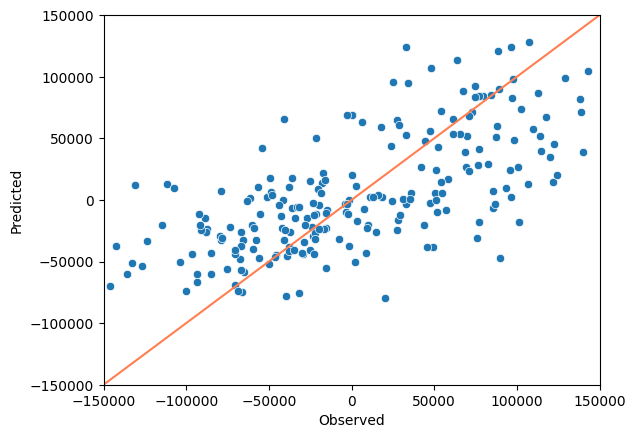

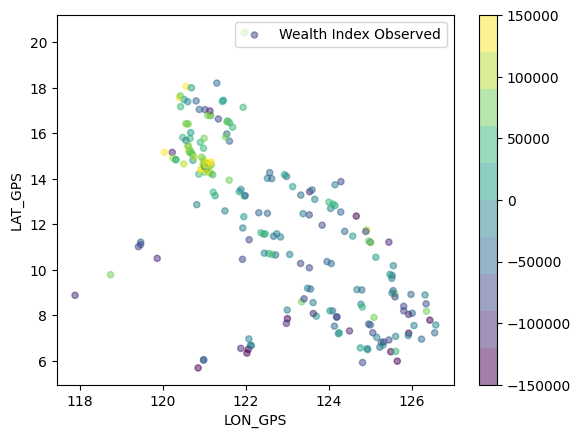

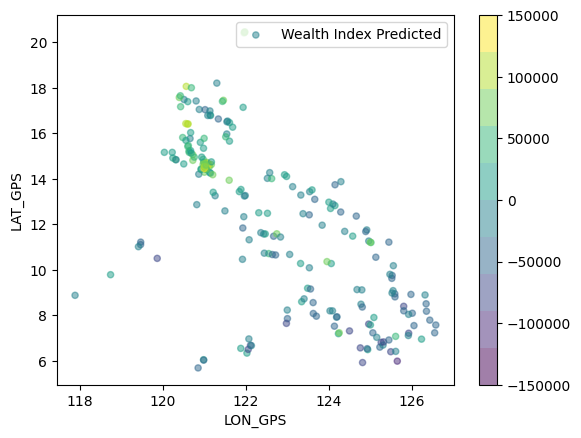

In [ ]:
# WEALTH INDEX 
#assign variables
data = matched_no_dupli.values
X, y = data[:, 5:4007], data[:,4008]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
matched_threshold = matched_no_dupli[matched_no_dupli['DISTANCE(M)'] < 500]
print(len(matched_threshold))

uniq = matched_threshold['MOSAIKSID'].nunique()
print(uniq)

duplicated_values = matched_threshold[matched_threshold.duplicated(subset=['MOSAIKSID'])]['MOSAIKSID']
duplicated_values_count = duplicated_values.value_counts()
print(duplicated_values_count)

957
957
Series([], Name: MOSAIKSID, dtype: int64)


alpha: 10.000000
Train R2 score: 0.5574673941177937
Test R2 score: 0.45856661962991463
r2: 0.458567


<ipython-input-26-8b85449f6afd>:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-26-8b85449f6afd>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


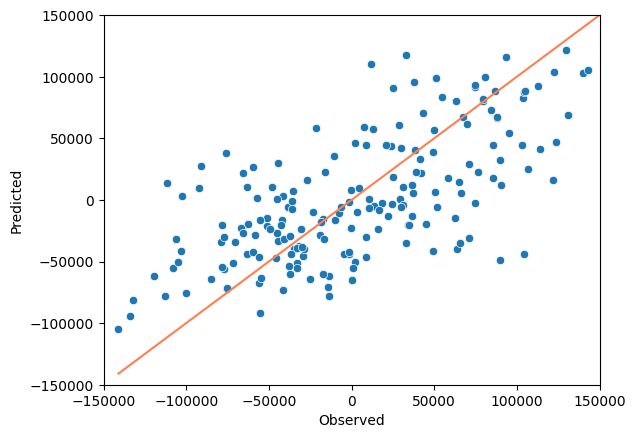

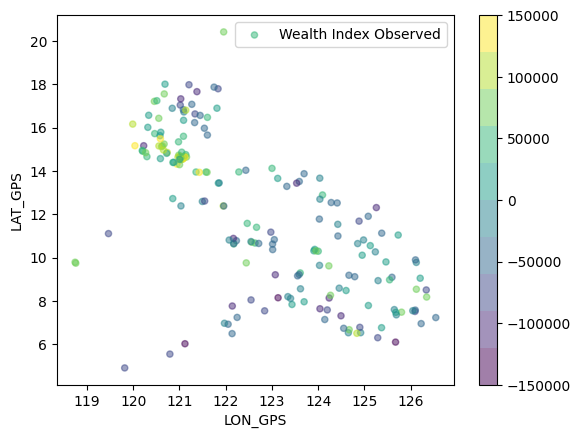

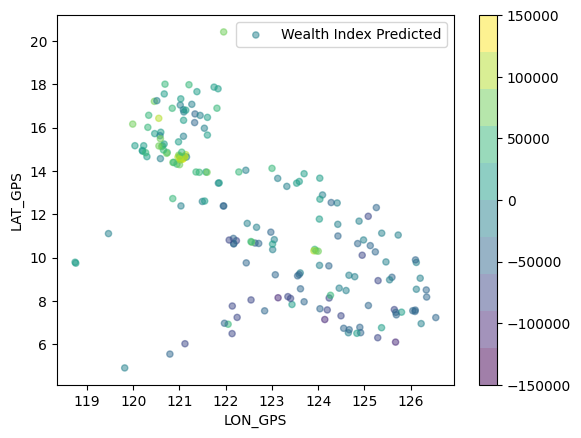

In [ ]:
# WEALTH INDEX 
#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

,LAT_GPS,LON_GPS,predicted,observed,residual
0,15.597995,121.085891,-13009.729353,36618.045455,49627.774808
1,10.290334,124.001838,70265.516917,43155.058824,27110.458093
2,7.233872,122.246999,-73204.864877,-41293.95,31910.914877
3,12.380682,121.947158,-43767.034716,104390.26087,148157.295585
4,13.947881,121.57259,10834.890575,30832.117647,19997.227072
...,...,...,...,...,...
187,14.535013,121.00502,90659.953720,24905.428571,65754.525149
188,7.466659,125.679201,-55321.635336,888.363636,56209.998972
189,15.483918,120.58691,68548.351137,131027.625,62479.273863
190,16.804842,121.136523,25235.515081,106722.076923,81486.561842


In [18]:
matched_threshold = matched_no_dupli[matched_no_dupli['DISTANCE(M)'] < 555]
print(len(matched_threshold))

uniq = matched_threshold['MOSAIKSID'].nunique()
print(uniq)

duplicated_values = matched_threshold[matched_threshold.duplicated(subset=['MOSAIKSID'])]['MOSAIKSID']
duplicated_values_count = duplicated_values.value_counts()
print(duplicated_values_count)

1071
1071
Series([], Name: MOSAIKSID, dtype: int64)


alpha: 10.000000
Train R2 score: 0.5590491923210339
Test R2 score: 0.5199258745594664
r2: 0.519926


<ipython-input-19-8b85449f6afd>:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-19-8b85449f6afd>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


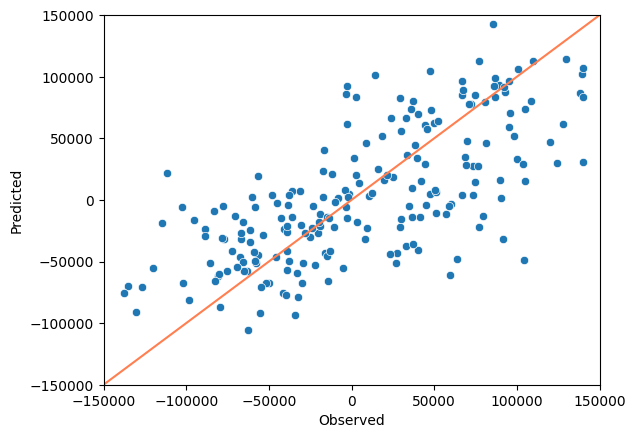

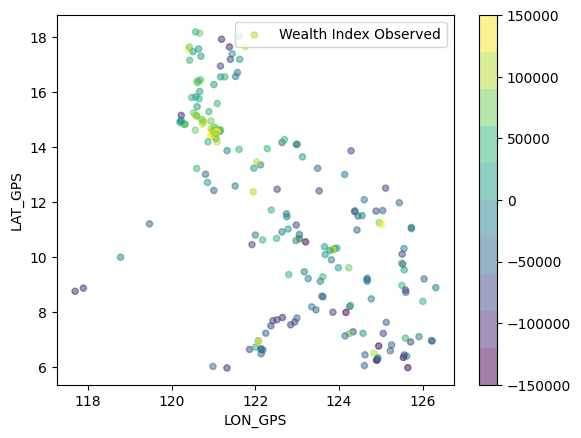

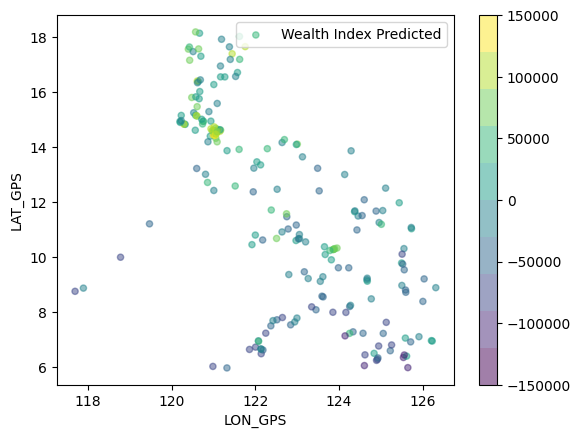

In [19]:

# WEALTH INDEX 
#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_test, y=y_pred)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Observed', ylabel='Predicted')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [20]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

,LAT_GPS,LON_GPS,predicted,observed,residual
0,14.952262,120.75668,51577.224074,98080.695652,46503.471579
1,14.117183,123.001517,62737.381560,50035.12,12702.26156
2,16.397146,120.632228,3628.086982,67020.4,63392.313018
3,14.510264,121.030858,85012.343027,66771.65,18240.693027
4,9.222964,123.26142,-29854.430405,-25044.0,4810.430405
...,...,...,...,...,...
210,6.662256,122.132027,-14389.613380,-2855.375,11534.23838
211,6.333842,124.929423,-55208.084280,-4982.863636,50225.220644
212,8.246866,124.273486,-4850.948833,59033.7,63884.648833
213,15.021213,120.715562,4328.366456,73636.37037,69308.003914


In [21]:
# Saving the final csv so we can inspect it

map_plot.to_csv('nearest_map_plot', index=False)
map_plot.to_csv(file_path + 'nearest_map_plot.csv')

***Random Forest Regression***

Train R2 score: 0.9287261286644983
Test R2 score: 0.4230435318794248
r2: 0.423044


<ipython-input-33-d9ced0c00236>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_plot['predicted'] = y_pred
<ipython-input-33-d9ced0c00236>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_plot['observed']= y_test
<ipython-input-33-d9ced0c00236>:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10), 

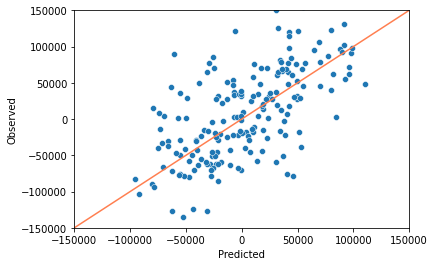

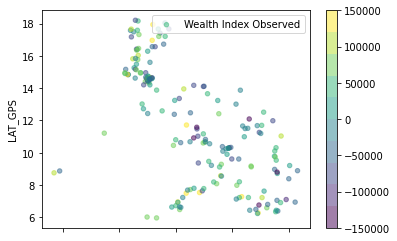

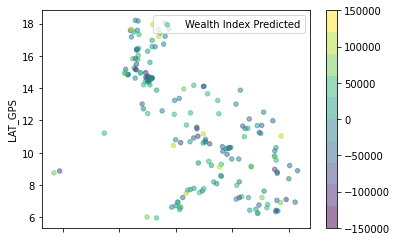

In [ ]:
matched_threshold = matched_no_dupli[matched_no_dupli['DISTANCE(M)'] < 500]

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Instantiate the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_pred, y=y_test)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000,150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Predicted', ylabel='Observed')


#merge lat/lons with test and predicted values
map_plot1 = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot = map_plot1.iloc[0:192, :]
map_plot['predicted'] = y_pred
map_plot['observed']= y_test

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

<ipython-input-34-f476cb8df3a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])


,LAT_GPS,LON_GPS,predicted,observed,residual
0,14.952262,120.75668,30708.723384,37168.3,6459.576616
1,14.117183,123.001517,-55413.212129,-48974.916667,6438.295462
2,16.397146,120.632228,10479.376112,58319.272727,47839.896615
3,14.510264,121.030858,39218.653677,170304.882353,131086.228676
4,9.222964,123.26142,22226.982279,-26695.761905,48922.744183
...,...,...,...,...,...
187,7.803768,122.644768,21744.826878,27311.526316,5566.699438
188,7.690191,122.418519,38402.388392,-21578.578947,59980.96734
189,8.203555,124.253586,-8069.168945,47172.88,55242.048945
190,14.944481,120.195408,35951.223324,68617.363636,32666.140312


Train R2 score: 0.9267434934216381
Test R2 score: 0.5106656582982302
r2: 0.510666


<ipython-input-35-4d4c0be07e3a>:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-35-4d4c0be07e3a>:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


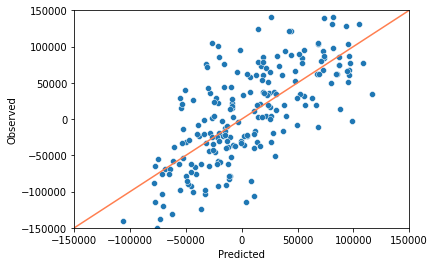

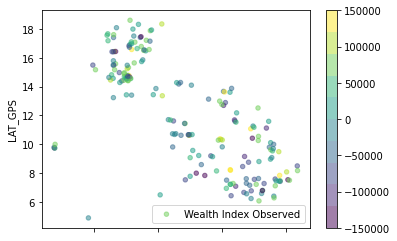

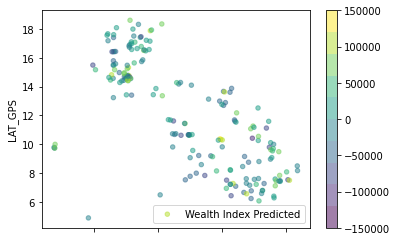

In [ ]:
matched_threshold = matched_no_dupli[matched_no_dupli['DISTANCE(M)'] < 555]

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Instantiate the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_pred, y=y_test)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Predicted', ylabel='Observed')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = pd.DataFrame(y_pred).iloc[0:197,:]
map_plot['observed']= pd.DataFrame(y_test).iloc[0:197,:]

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

,LAT_GPS,LON_GPS,predicted,observed,residual
0,10.33315,123.951299,97341.278629,76900.571429,20440.707201
1,8.758634,124.816674,-36317.982332,-61813.2,25495.217668
2,16.471789,121.604448,22094.893865,4375.363636,17719.530228
3,8.239211,124.243376,44075.676597,121876.090909,77800.414312
4,13.663865,124.034912,-49617.322612,-31305.529412,18311.7932
...,...,...,...,...,...
187,15.486326,119.953812,-64401.176409,-69504.904762,5103.728353
188,10.735446,122.546137,-15402.271022,-17016.869565,1614.598544
189,14.628886,120.454382,27687.868185,-19626.92,47314.788185
190,17.652702,120.421009,872.936874,32982.518519,32109.581645


In [ ]:
matched_threshold = matched_no_dupli[matched_no_dupli['DISTANCE(M)'] < 555]
len(matched_threshold)

1071